<a href="https://colab.research.google.com/github/SMShoron/Medical-Appointment-No-Shows/blob/main/DM_Missing_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Mining project
#Predicting Doctors Appointment Misses
#Data Source: https://www.kaggle.com/joniarroba/noshowappointments
#Download Dataset: https://drive.google.com/file/d/1im7yB0BZ0LjcabhxBgUDh0ahMAuQoKJR/view?usp=sharing


# Group: 5
# Members:

# 1. Aslam Mamud Akhanda (172-15-9585)

# 2. Sadia Islam (172-15-9645)

# 3. Md Faruk (172-15-9984)

#Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Load Data

In [ ]:
df = pd.read_csv('WorkDataset.csv')

In [ ]:
print("The shape of the DataFrame is => {}".format(df.shape))

The shape of the DataFrame is => (110527, 12)


#Basic Info of the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Hipertension    110527 non-null  int64  
 7   Diabetes        110527 non-null  int64  
 8   Alcoholism      110527 non-null  int64  
 9   Handcap         110527 non-null  int64  
 10  SMS_received    110527 non-null  int64  
 11  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 10.1+ MB


In [ ]:
# Print the top 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,0,No


#Correct Incosistencies in Data

In [ ]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMSReceived     110527 non-null  int64         
 11  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.1+ MB


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872500000000,5642903,F,2016-04-29,2016-04-29,62,1,0,0,0,0,No
1,558998000000000,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No
2,4262960000000,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No
3,867951000000,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No
4,8841190000000,5642494,F,2016-04-29,2016-04-29,56,1,1,0,0,0,No


#Data Wrangling, Feature Engineering and EDA

In [ ]:
print("Features in the DataFrame => {}".format(df.columns.ravel()))

Features in the DataFrame => ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay'
 'Age' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived'
 'NoShow']


In [ ]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,1,1,0,0,0,No


In [ ]:
# Print Unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `Hypertension` => {}".format(df.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.Handicap.unique()))
print("Unique Values in `SMSReceived` => {}".format(df.SMSReceived.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]


In [ ]:
df['Hypertension'] = df['Hypertension'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handicap'] = df['Handicap'].astype('object')
df['SMSReceived'] = df['SMSReceived'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Hypertension    110527 non-null  object        
 5   Diabetes        110527 non-null  object        
 6   Alcoholism      110527 non-null  object        
 7   Handicap        110527 non-null  object        
 8   SMSReceived     110527 non-null  object        
 9   NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 8.4+ MB


In [ ]:
# Print some sample data
df.sample(n=5)

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
74466,M,2016-05-16,2016-05-17,70,0,0,0,0,0,No
81446,F,2016-04-19,2016-05-11,1,0,0,0,0,0,Yes
94972,F,2016-06-03,2016-06-03,50,1,0,0,0,0,No
96701,F,2016-05-03,2016-06-06,5,0,0,0,0,0,No
13076,F,2016-05-10,2016-05-16,32,0,0,0,0,0,No


In [ ]:
# Print Unique Values for 'Age'
print("Unique Values in `Age` => {}".format(np.sort(df.Age.unique())))

Unique Values in `Age` => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [ ]:
print("Patients with `Age` less than -1 -> {}".format(df[df.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 -> {}".format(df[df.Age == 0].shape[0]))

Patients with `Age` less than -1 -> 1
Patients with `Age` equal to 0 -> 3539


In [ ]:
df = df[df.Age >= 0]

In [ ]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


In [ ]:
# Print Unique Values for 'ScheduledDay'
print("Unique Values in `ScheduledDay` => {}".format(np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '

In [ ]:
# Print Unique Values for 'AppointmentDay'
print("Unique Values in `AppointmentDay` => {}".format(np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `AppointmentDay` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


In [ ]:
# Get Day of the Week for ScheduledDay and AppointmentDay
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

In [ ]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

In [ ]:
# Sanity check to see if the Waiting Time is less than Zero for any of the data points.
print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df.Waiting_Time_days < 0].shape[0]))

There are [0] records where the Waiting Time is less than Zero.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Gender              110526 non-null  object        
 1   ScheduledDay        110526 non-null  datetime64[ns]
 2   AppointmentDay      110526 non-null  datetime64[ns]
 3   Age                 110526 non-null  int64         
 4   Hypertension        110526 non-null  object        
 5   Diabetes            110526 non-null  object        
 6   Alcoholism          110526 non-null  object        
 7   Handicap            110526 non-null  object        
 8   SMSReceived         110526 non-null  object        
 9   NoShow              110526 non-null  object        
 10  ScheduledDay_DOW    110526 non-null  object        
 11  AppointmentDay_DOW  110526 non-null  object        
 12  Waiting_Time_days   110526 non-null  int64         
dtypes: datetime64[ns](2), int64(2

In [ ]:
df.sample(n=10)

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
87112,F,2016-04-06,2016-06-08,51,0,0,0,0,1,No,Wednesday,Wednesday,63
21532,F,2016-04-26,2016-05-02,58,1,0,0,0,1,No,Tuesday,Monday,6
318,F,2016-04-29,2016-04-29,33,0,0,0,0,0,No,Friday,Friday,0
18444,F,2016-05-09,2016-05-09,7,0,0,0,0,0,No,Monday,Monday,0
37219,F,2016-05-06,2016-05-16,1,0,0,0,0,0,Yes,Friday,Monday,10
82452,F,2016-04-15,2016-05-05,35,0,0,0,0,0,No,Friday,Thursday,20
62866,M,2016-03-01,2016-05-11,67,0,0,0,0,1,No,Tuesday,Wednesday,71
26245,F,2016-05-06,2016-05-06,63,1,0,0,0,0,No,Friday,Friday,0
20404,F,2016-05-12,2016-05-24,59,1,0,0,0,0,Yes,Thursday,Tuesday,12
37062,F,2016-05-25,2016-05-25,75,1,0,0,0,0,No,Wednesday,Wednesday,0


In [ ]:
print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))

NoShow and Show Count of Patients

NoShow
No     88207
Yes    22319
dtype: int64

NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 79.81%
Percent of Patients who Did `Not Showed Up` => 20.19%


#Data Visualization

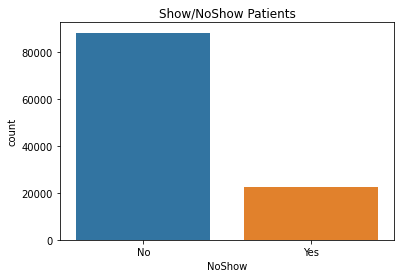

In [ ]:
#Show/NoShow
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

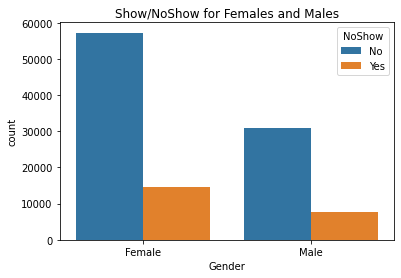

In [ ]:
#Gender
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#Model Building

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Gender              110526 non-null  int64 
 1   Age                 110526 non-null  int64 
 2   Hypertension        110526 non-null  object
 3   Diabetes            110526 non-null  object
 4   Alcoholism          110526 non-null  object
 5   Handicap            110526 non-null  object
 6   SMSReceived         110526 non-null  object
 7   NoShow              110526 non-null  int64 
 8   ScheduledDay_DOW    110526 non-null  int64 
 9   AppointmentDay_DOW  110526 non-null  int64 
 10  Waiting_Time_days   110526 non-null  int64 
 11  ScheduledDay_Y      110526 non-null  int64 
 12  ScheduledDay_M      110526 non-null  int64 
 13  ScheduledDay_D      110526 non-null  int64 
 14  AppointmentDay_Y    110526 non-null  int64 
 15  AppointmentDay_M    110526 non-null  int64 
 16  Ap

In [ ]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#ScheduledDay_DOW
le = LabelEncoder()
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
#AppointmentDay_DOW
le = LabelEncoder()
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])
print("LabelEncoder Completed")

#NoShow
le = LabelEncoder()
df['NoShow'] = le.fit_transform(df['NoShow'])

LabelEncoder Completed


In [ ]:
df.sample(n=10)

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
89279,0,37,0,0,0,0,1,0,0,5,12,2016,5,20,2016,6,1
87673,0,54,0,0,0,0,1,1,4,1,13,2016,5,24,2016,6,6
90776,1,63,1,0,1,0,0,0,5,5,0,2016,6,8,2016,6,8
80178,0,50,1,0,0,0,0,0,1,5,2,2016,5,9,2016,5,11
60570,1,42,0,0,0,0,1,0,5,5,14,2016,4,20,2016,5,4
102471,0,38,0,0,0,0,0,0,1,1,0,2016,6,6,2016,6,6
3777,1,1,0,0,0,0,0,0,5,5,0,2016,5,18,2016,5,18
74110,0,2,0,0,0,0,0,0,4,4,0,2016,5,17,2016,5,17
65429,1,5,0,0,0,0,0,0,5,5,0,2016,5,4,2016,5,4
48937,0,39,0,0,0,0,1,0,5,1,33,2016,4,27,2016,5,30


In [ ]:
# Get the Dependent and Independent Features.
X = df.drop(['NoShow'], axis=1)
y = df['NoShow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.34
Age -- 0.21
Hypertension -- 0.09
Diabetes -- 0.08
Alcoholism -- 0.07
Handicap -- 0.06
SMSReceived -- 0.05
ScheduledDay_DOW -- 0.03
AppointmentDay_DOW -- 0.02
Waiting_Time_days -- 0.02
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.01
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [ ]:
dt_clf.score(X_test, y_test)

0.7405274990404124

# Random Forest Claasifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(rf_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.51
Age -- 0.15
Hypertension -- 0.06
Diabetes -- 0.05
Alcoholism -- 0.04
Handicap -- 0.04
SMSReceived -- 0.03
ScheduledDay_DOW -- 0.02
AppointmentDay_DOW -- 0.02
Waiting_Time_days -- 0.02
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.01
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [ ]:
rf_clf.score(X_test, y_test)

0.7578549103470965

# Naive

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
47393,1,3,0,0,0,0,0,0,5,68,2016,3,11,2016,5,18
77394,1,13,0,0,0,0,1,3,5,20,2016,5,5,2016,5,25
102845,0,30,0,0,0,0,1,3,3,28,2016,5,5,2016,6,2
104092,0,9,0,0,0,0,0,1,3,17,2016,5,16,2016,6,2
22091,0,79,0,0,0,0,0,3,3,0,2016,5,19,2016,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,11,0,0,0,0,1,3,5,6,2016,5,19,2016,5,25
45891,0,85,1,0,0,0,0,0,0,0,2016,5,6,2016,5,6
42613,1,0,0,0,0,0,1,1,5,16,2016,4,18,2016,5,4
43567,1,4,0,0,0,0,0,0,0,0,2016,5,20,2016,5,20


In [ ]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
naive_bayes_model.score(X_test, y_test)

0.7059823435872128

# KNN

In [ ]:
df.head()

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,0,62,1,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
1,1,56,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
2,0,62,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
3,0,8,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
4,0,56,1,1,0,0,0,0,0,0,0,2016,4,29,2016,4,29


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('NoShow',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('NoShow',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M
0,-0.733842,1.077926,2.017366,-0.278262,-0.177068,-0.137723,-0.687616,-1.482863,-1.484607,-0.667581,0.023691,-1.150977,1.578037,0.0,-2.554045,1.821962
1,1.362692,0.818297,-0.495696,-0.278262,-0.177068,-0.137723,-0.687616,-1.482863,-1.484607,-0.667581,0.023691,-1.150977,1.578037,0.0,-2.554045,1.821962
2,-0.733842,1.077926,-0.495696,-0.278262,-0.177068,-0.137723,-0.687616,-1.482863,-1.484607,-0.667581,0.023691,-1.150977,1.578037,0.0,-2.554045,1.821962
3,-0.733842,-1.258733,-0.495696,-0.278262,-0.177068,-0.137723,-0.687616,-1.482863,-1.484607,-0.667581,0.023691,-1.150977,1.578037,0.0,-2.554045,1.821962
4,-0.733842,0.818297,2.017366,3.593730,-0.177068,-0.137723,-0.687616,-1.482863,-1.484607,-0.667581,0.023691,-1.150977,1.578037,0.0,-2.554045,1.821962


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df['NoShow'],test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [ ]:
knn_model.score(X_test, Y_test)

0.7932324024368177